In [ ]:
#U projektu ce biti koriscena tri dataseta: MIAS, DDSM i CBIS-DDSM.

#MIAS je jedan od najstarijih i najčešće korišćenih datasetova za analizu mamografskih slika.
#Sadrži mamografske slike sa pripadajućim anotacijama koje uključuju informacije o abnormalnostima kao što su tumori, ciste, ili kalcifikacije.
#Sastoji se od 322 mamografske slike (u ukupno 161 par, tj. desne i leve dojke).
#Koristi se za razvoj i evaluaciju algoritama za automatsko prepoznavanje i klasifikaciju mamografskih abnormalnosti.

#DDSM je obimniji i bogatiji dataset u odnosu na MIAS.
#Sadrži digitalizovane mamografske slike zajedno sa detaljnim anotacijama koje pružaju informacije o abnormalnostima i dijagnozama.
#Koristi se za istraživanja u oblasti automatske analize mamografija i za razvoj sistema za kompjutersku podršku u dijagnostici (CAD - Computer-Aided Detection/Diagnosis).

#CBIS-DDSM namenjen je za istraživanja u oblasti dubokog učenja i omogućava razvoj naprednih algoritama za detekciju i klasifikaciju abnormalnosti u mamografijama.

In [4]:
#Provera trenutnog radnog direktorijuma(nije kod svakoga isti - lokalni je)

import os

# Prikaz trenutnog radnog direktorijuma
current_directory = os.getcwd()
print("Trenutni radni direktorijum:", current_directory)

Trenutni radni direktorijum: C:\Users\Win10\Desktop\MIEP


In [14]:
# Prikaz sadržaja trenutnog radnog direktorijuma
contents = os.listdir(current_directory)
print("Sadržaj radnog direktorijuma:", contents)

Sadržaj radnog direktorijuma: ['.ipynb_checkpoints', 'CBIS-DDSM.zip', 'CBIS-DDSMunzip', 'DDSM.zip', 'DDSMunzip', 'MIAS.zip', 'MIASunzip', 'Projekat.ipynb']


In [6]:
#Unzipovanje MIAS dataseta

import os
import zipfile

# Ime ZIP fajla
zip_file_name = "MIAS.zip"

# Definisanje imena izlaznog direktorijuma
output_directory = "MIASunzip"

# Kreiranje izlaznog direktorijuma ako ne postoji
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Kreiran je direktorijum: {output_directory}")

# Provera da li ZIP fajl postoji u radnom direktorijumu
if zip_file_name in os.listdir(os.getcwd()):
    # Otvaranje ZIP fajla
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Unzip sadržaja u navedeni izlazni direktorijum
        zip_ref.extractall(output_directory)
        print(f"Fajl '{zip_file_name}' je uspešno otpakovan u '{output_directory}'")
else:
    print(f"Fajl '{zip_file_name}' nije pronađen u '{os.getcwd()}'")

Fajl 'MIAS.zip' je uspešno otpakovan u 'MIASunzip'


In [6]:
#Ispisuje broj slika u MIAS datasetu

import os

# Definisanje putanje do direktorijuma sa slikama
image_directory = "C:\\Users\\Win10\\Desktop\\MIEP\\MIASunzip\\all-mias"

# Prikupljanje svih .pgm fajlova iz direktorijuma
pgm_files = [f for f in os.listdir(image_directory) if f.endswith('.pgm')]

# Prikaz broja pronađenih .pgm fajlova
print(f"Pronađeno je {len(pgm_files)} .pgm fajlova u '{image_directory}'")

Pronađeno je 322 .pgm fajlova u 'C:\Users\Win10\Desktop\MIEP\MIASunzip\all-mias'


In [12]:
%pip install matplotlib

# Instalacija Pillow biblioteke
%pip install pillow

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 991.0 kB/s eta 0:00:01
     --------------------- ----------------- 92.2/165.5 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  163.8/165.5 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 804.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 5.0 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.0 MB 4.7 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.0 MB 3.5 MB/s eta 0:00:03
   -- ---

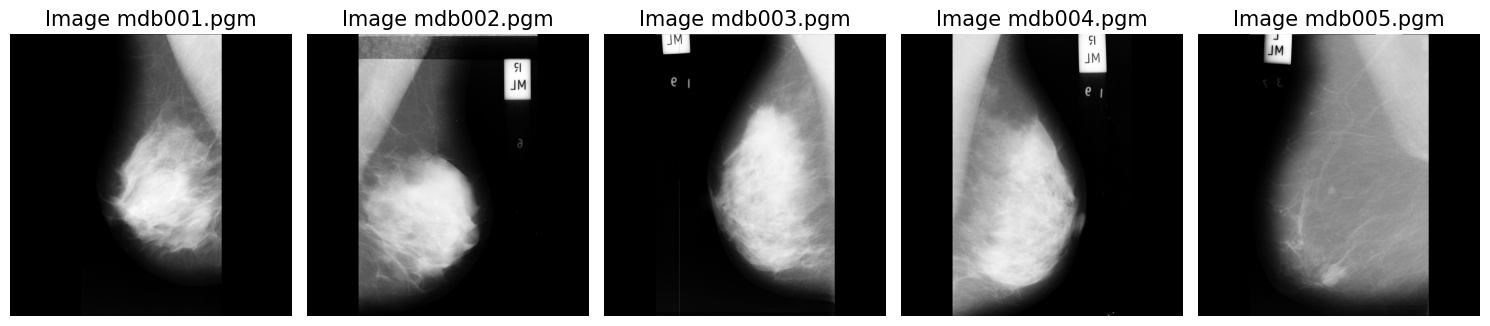

In [17]:
#Prikazivanje 5 slika iz MIAS dataseta

import os
import matplotlib.pyplot as plt
from PIL import Image

# Pretpostavljamo da su slike u formatu PGM u direktorijumu 'image_directory'
image_directory = 'C:\\Users\\Win10\\Desktop\\MIEP\\MIASunzip\\all-mias'  # Zameniti sa stvarnom putanjom do direktorijuma sa slikama
pgm_files = [f for f in os.listdir(image_directory) if f.endswith('.pgm')]

# Broj slika za prikazivanje
num_images_to_display = 5

# Kreiramo figure i niz podgrafa u jednom redu
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))  # figsize podešava veličinu figure

# Prikaz svake slike
for i, file_name in enumerate(pgm_files[:num_images_to_display]):
    # Kreiranje putanje do svake slike
    file_path = os.path.join(image_directory, file_name)
    
    # Učitavanje slike
    image = Image.open(file_path)
    
    # Prikaz slike na odgovarajućem podgrafu
    axes[i].imshow(image, cmap='gray')  # Koristimo cmap='gray' za crno-bele slike
    axes[i].set_title(f"Image {file_name}", fontsize=15)
    axes[i].axis('off')  # Isključujemo prikaz osa

# Prikazujemo figure
plt.tight_layout()
plt.show()


In [ ]:
#Unzipovanje DDSM dataseta

import os
import zipfile

# Ime ZIP fajla
zip_file_name = "DDSM.zip"

# Definisanje imena izlaznog direktorijuma
output_directory = "DDSMunzip"

# Kreiranje izlaznog direktorijuma ako ne postoji
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Kreiran je direktorijum: {output_directory}")

# Provera da li ZIP fajl postoji u radnom direktorijumu
if zip_file_name in os.listdir(os.getcwd()):
    # Otvaranje ZIP fajla
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Unzip sadržaja u navedeni izlazni direktorijum
        zip_ref.extractall(output_directory)
        print(f"Fajl '{zip_file_name}' je uspešno otpakovan u '{output_directory}'")
else:
    print(f"Fajl '{zip_file_name}' nije pronađen u '{os.getcwd()}'")

In [16]:
#Unzipovanje CBIS-DDSM dataseta

import os
import zipfile

# Ime ZIP fajla
zip_file_name = "CBIS-DDSM.zip"

# Definisanje imena izlaznog direktorijuma
output_directory = "CBIS-DDSMunzip"

# Kreiranje izlaznog direktorijuma ako ne postoji
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Kreiran je direktorijum: {output_directory}")

# Provera da li ZIP fajl postoji u radnom direktorijumu
if zip_file_name in os.listdir(os.getcwd()):
    # Otvaranje ZIP fajla
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Unzip sadržaja u navedeni izlazni direktorijum
        zip_ref.extractall(output_directory)
        print(f"Fajl '{zip_file_name}' je uspešno otpakovan u '{output_directory}'")
else:
    print(f"Fajl '{zip_file_name}' nije pronađen u '{os.getcwd()}'")

Fajl 'CBIS-DDSM.zip' je uspešno otpakovan u 'CBIS-DDSMunzip'


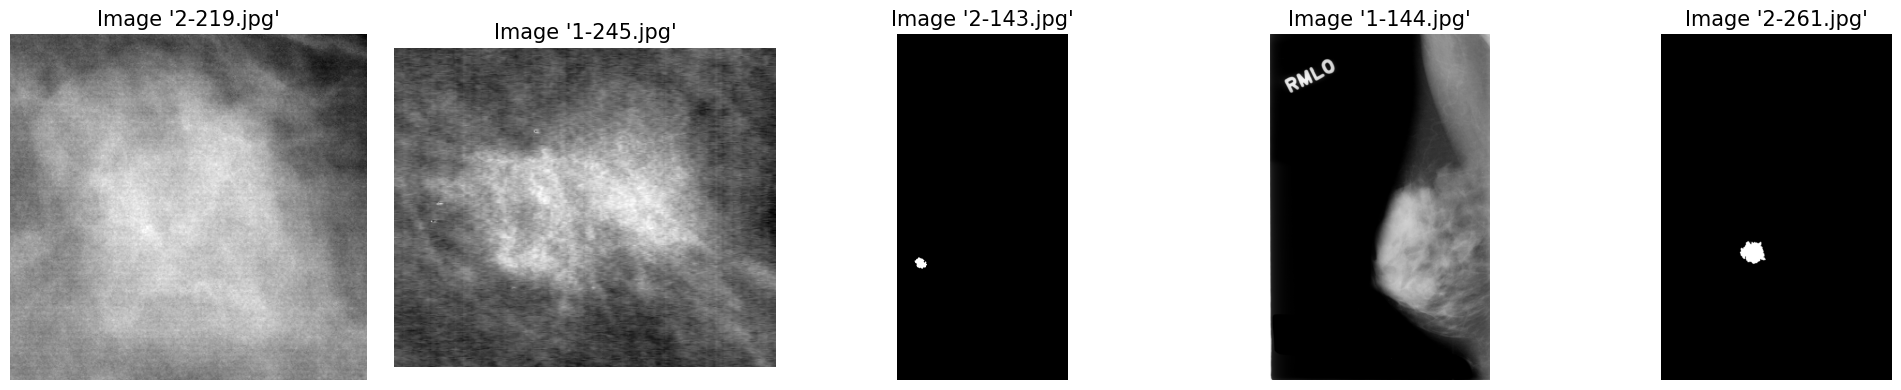

In [16]:
#Prikazivanje 5 slika iz CBIS-DDSM dataseta

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

main_directory = "CBIS-DDSMunzip/jpeg"

# Lista za čuvanje putanja do pronađenih slika
image_paths = []

# Prolaz kroz sve poddirektorijume i fajlove
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):  # Filtrirajte samo slike
            image_paths.append(os.path.join(root, file))

# Proverite da li postoji dovoljno slika
num_images_to_display = 5

# Nasumično odaberite 5 slika
random_image_paths = random.sample(image_paths, num_images_to_display)

# Prikaz nasumično odabranih slika
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))  # figsize podešava veličinu figure

for i, image_path in enumerate(random_image_paths):
    image = Image.open(image_path)
    
    # Konvertovanje slike u crno-belo ako je potrebno
    if image.mode == 'RGB':
        image = image.convert('L')
    
    # Prikaz slike na odgovarajućem podgrafu
    axes[i].imshow(image, cmap='gray')  # Prikaz kao crno-bela
    axes[i].set_title(f"Image '{os.path.basename(image_path)}'", fontsize=15)
    axes[i].axis('off')  # Isključujemo prikaz osa

# Prilagođavanje rasporeda
plt.tight_layout()
plt.show()


In [1]:
#Instalacija potrebnih biblioteka

!pip install numpy matplotlib scikit-image

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB 991.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/12.9 MB 1.2 MB/s eta 0:00:12
   ---------------------------------------- 0.1/12.9 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.2/12.9 MB 1.1 MB/s eta 0:00:13
    --------------------------------------- 0.2/12.9 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/12.9 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.4/12.9 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/12.9 MB 1.8 MB/s eta 0:00:07
   -- -

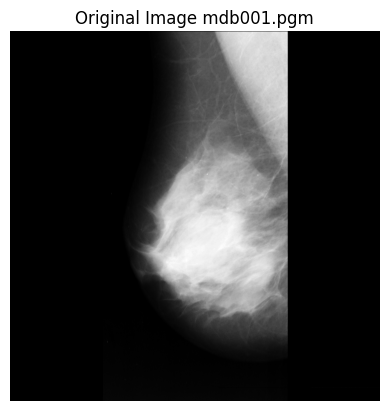

In [18]:
#Prikaz originalne slike iz MIAS dataseta

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise

# Putanja do direktorijuma sa MIAS datasetom
data_dir = 'C:\\Users\\Win10\\Desktop\\MIEP\\MIASunzip\\all-mias'

# Učitavanje slika
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".pgm"):
            img = io.imread(os.path.join(folder, filename))
            if img is not None:
                images.append((filename, img))
    return images

# Učitavanje slika
images = load_images_from_folder(data_dir)

# Prikaz prve slike kao primer
image_name, image = images[0]
plt.imshow(image, cmap='gray')
plt.title(f'Original Image {image_name}')
plt.axis('off')
plt.show()

In [6]:
!pip install PyWavelets

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB 660.6 kB/s eta 0:00:07
   ---------------------------------------- 0.1/4.2 MB 650.2 kB/s eta 0:00:07
    --------------------------------------- 0.1/4.2 MB 657.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/4.2 MB 656.4 kB/s eta 0:00:07
   - -------------------------------------- 0.1/4.2 MB 714.4 kB/s eta 0:00:06
   - -------------------------------------- 0.2/4.2 MB 656.4 kB/s eta 0:00:07
   - -------------------------------------- 0.2/4.2 MB 692.4 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/4.2 MB 689.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/4.2 MB 656.0 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.2 MB 630.5 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.2 MB 654.6 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.2 MB 654.6 kB/s eta 0:0

In [19]:
%pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 65.6 kB/s eta 0:09:52
   ---------------------------------------- 0.0/38.8 MB 65.6 kB/s eta 0:09:52
   -

In [ ]:
#PRETPROCESIRANJE Datasetova 

In [ ]:
#Datasetovi su pretprocesirani razlicitim tehnikama: Image Denoisng, Crop Edges i Image reshaping.

#Image Denoisng je proces uklanjanja ili smanjenja šuma iz slike dok se nastoji sačuvati što više korisnih informacija.
#Crop Edges je proces uklanjanja nepotrebnih ili nebitnih delova sa ivica slike. 
#Image reshaping je proces prilagođavanja dimenzija slike, obično promene veličine (resize) ili preoblikovanja (reshape) da bi odgovarale specifičnim zahtevima. 

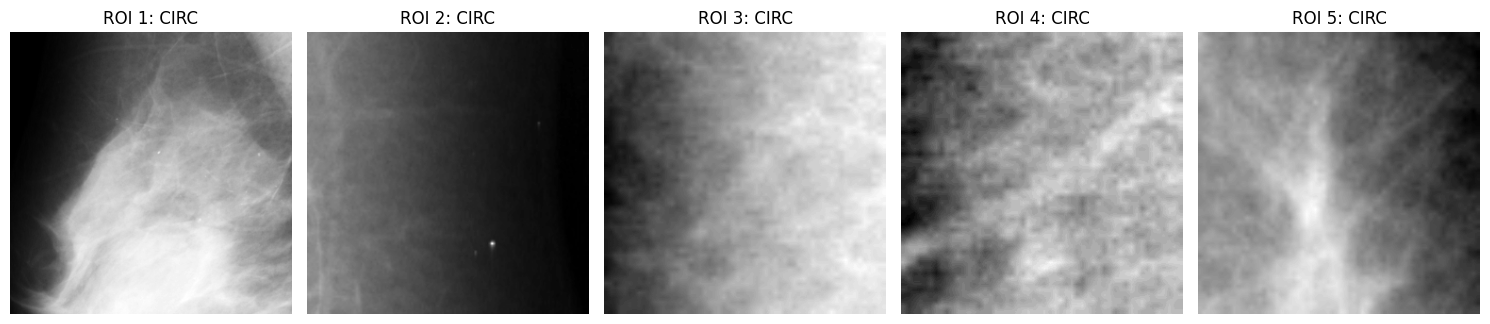

In [1]:
#Pretprocesiranje slika iz MIAS dataseta, izdvajanje ROI i cuvanje u npy formatu
#Region of Interest (ROI) je specifično područje na slici koje je od ključnog značaja za analizu ili obradu. 
#U ovom projektu ROI se odnosi na delove slike koji sadrze abnormalnosti.

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Putanja do MIAS dataset-a i info.txt datoteke
folder_path = 'C:\\Users\\Win10\\Desktop\\MIEP\\MIASunzip\\all-mias'
info_file = 'C:\\Users\\Win10\\Desktop\\MIEP\\MIASunzip\\all-mias\\info.txt'
output_folder = 'C:\\Users\\Win10\\Desktop\\MIEP\\MIASnpy'  # Putanja do foldera za NumPy datoteke

# Funkcija za učitavanje informacija iz info.txt
def load_info(info_file):
    with open(info_file, 'r') as f:
        lines = f.readlines()

    info = []
    for line in lines:
        line = line.strip().split()
        if len(line) >= 7:  # Treba nam minimalno 7 kolona za ROI (x, y, radius)
            data = {
                'reference_number': line[0],
                'background_tissue': line[1],
                'abnormality_class': line[2],
                'abnormality_severity': line[3],
                'x_coordinate': int(line[4]) if line[4].isdigit() else None,
                'y_coordinate': int(line[5]) if line[5].isdigit() else None,
                'radius': int(line[6]) if line[6].isdigit() else None
            }
            info.append(data)

    return info

# Funkcija za učitavanje slika iz MIAS dataset-a
def load_mias_images(folder_path):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.pgm')]
    images = {os.path.basename(path).split('.')[0]: cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths}
    return images

# Funkcija za izdvajanje ROI iz slike
def extract_roi(image, x, y, radius):
    if image is None or x is None or y is None or radius is None:
        return None

    # Definišemo bounding box za ROI
    start_x = max(x - radius, 0)
    start_y = max(y - radius, 0)
    end_x = min(x + radius, image.shape[1])
    end_y = min(y + radius, image.shape[0])

    roi = image[start_y:end_y, start_x:end_x]
    return roi

if __name__ == "__main__":
    # Učitavanje informacija i slika
    info = load_info(info_file)
    images = load_mias_images(folder_path)
    
    # Kreiranje novog foldera za NumPy datoteke
    os.makedirs(output_folder, exist_ok=True)
    
    roi_data = []
    roi_labels = []
    
    for entry in info:
        ref_number = entry['reference_number']
        x = entry['x_coordinate']
        y = entry['y_coordinate']
        radius = entry['radius']
        abnormality_class = entry['abnormality_class']
        
        if ref_number in images:
            image = images[ref_number]
            roi = extract_roi(image, x, y, radius)
            
            if roi is not None and roi.size > 0:
                # Normalizacija ROI-a
                roi_normalized = cv2.resize(roi, (299, 299)) / 255.0  # Primer normalizacije i promene veličine
                roi_data.append(roi_normalized)
                roi_labels.append(abnormality_class)

    # Pretvaranje lista u NumPy nizove
    roi_data = np.array(roi_data)
    roi_labels = np.array(roi_labels)

    # Snimanje NumPy nizova u fajlove
    np.save(os.path.join(output_folder, 'mias_roi_data.npy'), roi_data)
    np.save(os.path.join(output_folder, 'mias_roi_labels.npy'), roi_labels)
    
    # Prikaz nekih ROI-ova za pregled
    plt.figure(figsize=(15, 6))
    
    for i in range(min(5, len(roi_data))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(roi_data[i], cmap='gray')
        plt.title(f'ROI {i+1}: {roi_labels[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [16]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.5 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/11.5 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.5 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.5 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.5 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.5 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.5 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.5 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.5 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.5 MB 4.1 MB/s eta 0:00:03
   ---

In [1]:
#Pretprocesiranje CBIS-DDSM dataseta i cuvanje slika u npy formatu

import os
import cv2
import numpy as np
from PIL import Image  # Import Image from PIL module
import shutil

# Putanja do foldera sa slikama i CSV fajlovima
image_folder = 'C:\\Users\\Win10\\Desktop\\MIEP\\CBIS-DDSMunzip\\jpeg'
output_folder = 'C:\\Users\\Win10\\Desktop\\MIEP\\CBIS-DDSMnpy'

# Brišemo postojeće output foldere pre novog pokretanja
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)

# Kreiranje output foldera nakon brisanja
os.makedirs(output_folder, exist_ok=True)

# Funkcija za crop ivica slike
def crop_image(img, target_size):
    h, w = img.shape[:2]
    start_row = int((h - target_size[0]) / 2)
    start_col = int((w - target_size[1]) / 2)
    cropped_img = img[start_row:start_row + target_size[0], start_col:start_col + target_size[1]]
    return cropped_img

# Funkcija za promenu veličine slike
def resize_image(img, new_size):
    img_pil = Image.fromarray(img)
    img_resized = img_pil.resize(new_size)
    return np.array(img_resized)

# Funkcija za obradu slike
def process_image(image_path, output_image_path):
    # Provera da li fajl postoji
    if not os.path.exists(image_path):
        print(f"Fajl ne postoji: {image_path}")
        return

    # Učitavanje slike
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Provera da li je slika uspešno učitana
    if image is None:
        print(f"Neuspešno učitavanje slike: {image_path}")
        return

    # Korak 1: Denoising sa Gaussian filterom (opcioni korak)
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Korak 2: Rezanje ivica (crop edges)
    height, width = denoised_image.shape
    cropped_image = crop_image(denoised_image, (128, 128))

    # Korak 3: Promena veličine (resize)
    resized_image = resize_image(cropped_image, (299, 299))

    # Čuvanje obrađene slike u .npy formatu
    np.save(output_image_path, resized_image)

# Rekurzivna funkcija za procesiranje slika
def process_all_images(root_folder, output_folder):
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.jpg'):
                # Putanja do slike
                image_path = os.path.join(root, file)
                
                # Relativna putanja da bi se sačuvala struktura foldera
                relative_path = os.path.relpath(root, root_folder)
                
                # Generisanje putanje za čuvanje obrađene slike
                output_image_dir = os.path.join(output_folder, relative_path)
                os.makedirs(output_image_dir, exist_ok=True)
                output_image_path = os.path.join(output_image_dir, file.replace('.jpg', '.npy'))

                # Procesiranje slike
                process_image(image_path, output_image_path)

# Pokretanje procesiranja slika
process_all_images(image_folder, output_folder)

print("Procesiranje slika završeno!")

Procesiranje slika završeno!


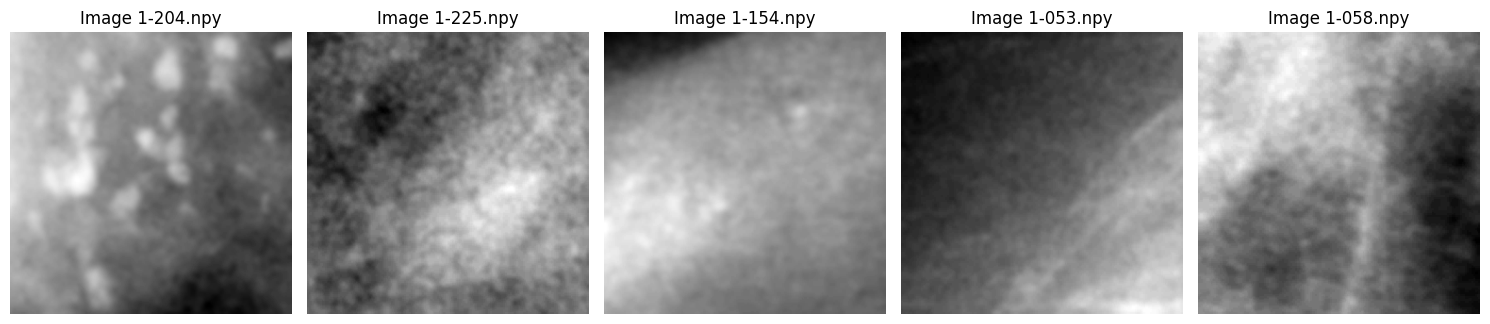

In [2]:
#Prikaz 5 pretprocesiranih slika iz CBIS-DDSM dataseta

import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Putanja do foldera sa .npy slikama
output_folder = 'C:\\Users\\Win10\\Desktop\\MIEP\\CBIS-DDSMnpy'

# Funkcija za prikaz slika iz random 3 podfoldera u jednom redu
def show_images_from_random_folders(folder):
    # Prikupljanje svih podfoldera koji sadrže .npy slike
    folders_with_npy = []
    for root, dirs, files in os.walk(folder):
        if any(file.endswith('.npy') for file in files):
            folders_with_npy.append(root)
    
    # Ako ima manje od 3 podfoldera s .npy slikama, ne možemo prikazati 3 slike
    if len(folders_with_npy) < 5:
        print("Nedovoljno podfoldera s .npy slikama za prikazivanje.")
        return
    
    # Nasumični odabir 3 različita podfoldera
    random_folders = random.sample(folders_with_npy, 5)
    
    # Prikazivanje slika iz odabranih podfoldera u jednom redu
    plt.figure(figsize=(15, 5))
    for i, folder_path in enumerate(random_folders):
        # Prikaz samo prve slike iz svakog odabranih podfoldera
        image_path = next(file for file in os.listdir(folder_path) if file.endswith('.npy'))
        image = np.load(os.path.join(folder_path, image_path))
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {os.path.basename(image_path)}")

    #axes[i].set_title(f"Image '{os.path.basename(image_path)}'", fontsize=15)
    plt.tight_layout()
    plt.show()

# Prikaz slika iz random 3 podfoldera u jednom redu
show_images_from_random_folders(output_folder)


In [ ]:
#Unzipovanje DDSM dataseta

import os
import zipfile

# Ime ZIP fajla
zip_file_name = "DDSM.zip"

# Definisanje imena izlaznog direktorijuma
output_directory = "DDSMunzip"

# Kreiranje izlaznog direktorijuma ako ne postoji
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Kreiran je direktorijum: {output_directory}")

# Provera da li ZIP fajl postoji u radnom direktorijumu
if zip_file_name in os.listdir(os.getcwd()):
    # Otvaranje ZIP fajla
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Unzip sadržaja u navedeni izlazni direktorijum
        zip_ref.extractall(output_directory)
        print(f"Fajl '{zip_file_name}' je uspešno otpakovan u '{output_directory}'")
else:
    print(f"Fajl '{zip_file_name}' nije pronađen u '{os.getcwd()}'")

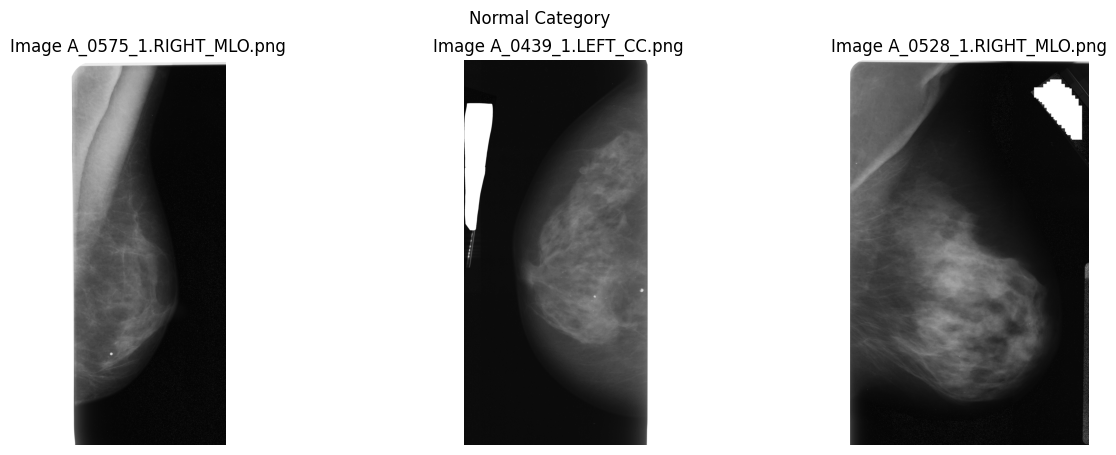

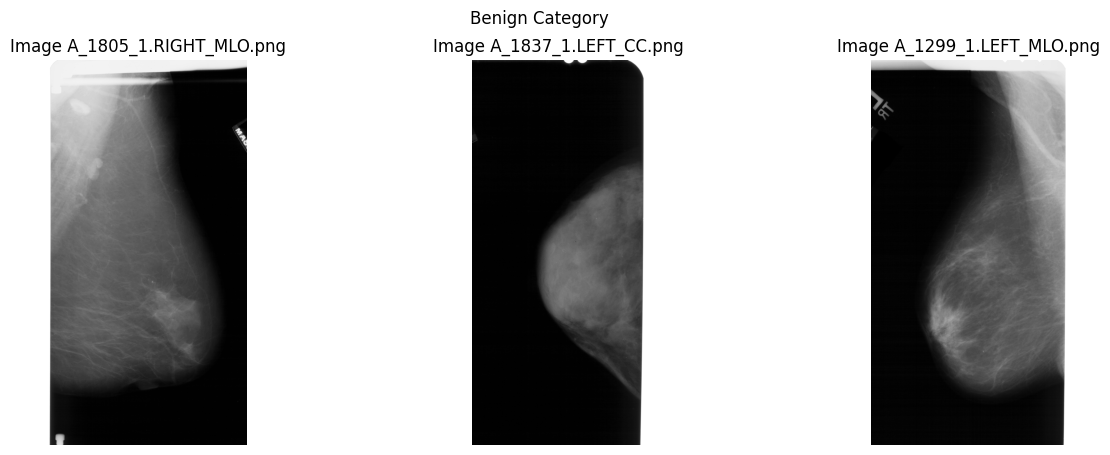

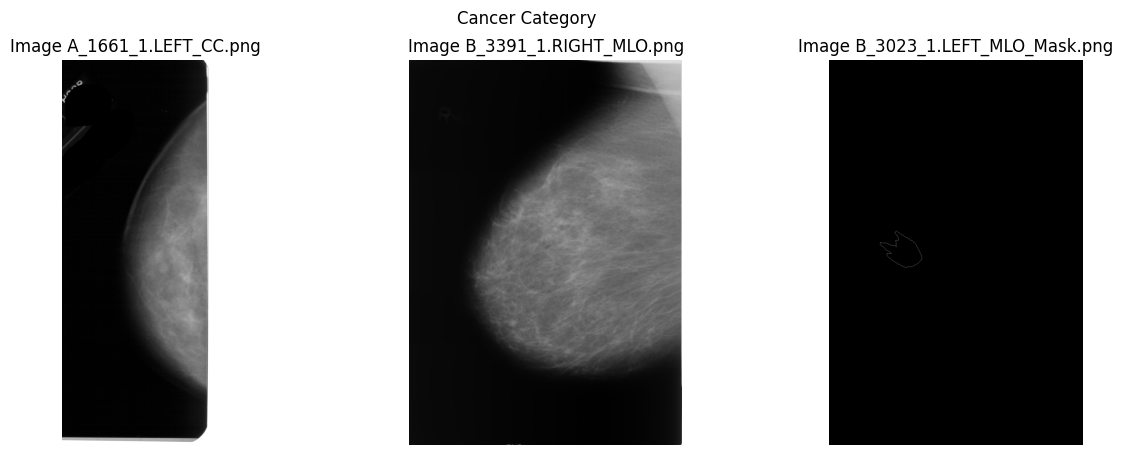

In [30]:
#Prikaz po 3 originalne slike iz svakog foldera - Normal, Benign i Cancer

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Definišemo putanje do foldera
folders = {
    "Normal": "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Normal",
    "Benign": "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Benign",
    "Cancer": "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Cancer"
}

def get_random_images(folder_path, num_images=3):
    """
    Funkcija za pronalaženje i vraćanje putanja do nasumično odabranih slika iz datog foldera i njegovih podfoldera.
    folder_path: Putanja do osnovnog foldera.
    num_images: Broj nasumičnih slika za odabir.
    """
    image_files = []
    
    # Prolazimo kroz sve foldere i podfoldere
    for root, dirs, files in os.walk(folder_path):
        # Dodajemo putanje do svih .png fajlova u listu
        for file in files:
            if file.endswith('.png'):
                image_files.append(os.path.join(root, file))
    
    # Biramo nasumično num_images slika
    return random.sample(image_files, min(num_images, len(image_files)))

def show_images_from_folders(folders, num_images=3):
    """
    Funkcija za prikazivanje slika iz više foldera.
    folders: Rečnik sa nazivom kategorije i putanjom do foldera.
    num_images: Broj slika za prikazivanje iz svakog foldera.
    """
    for category, folder in folders.items():
        image_paths = get_random_images(folder, num_images)
        
        plt.figure(figsize=(15, 5))
        for i, image_path in enumerate(image_paths):
            image = Image.open(image_path)
            
            plt.subplot(1, num_images, i + 1)
            plt.imshow(image, cmap='gray')
            #plt.title(f"{category} {i + 1}")
            plt.title(f"Image {os.path.basename(image_path)}")

            plt.axis('off')
        
        plt.suptitle(f"{category} Category")
        plt.show()

# Prikazujemo slike iz svake kategorije
show_images_from_folders(folders)

In [3]:
#Pretprocesiranje DDSM dataseta i cuvanje slika u npy formatu

import os
import numpy as np
import cv2
from PIL import Image
import shutil  # Dodajemo shutil za brisanje direktorijuma

def preprocess_image(image):
    # Denoising sa GaussianBlur
    denoised_img = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Crop edges 
    cropped_img = crop_image(denoised_img, (128, 128))
    
    # Resize
    resized_img = resize_image(cropped_img, (299, 299))
    
    return resized_img

def crop_image(img, target_size):
    h, w = img.shape[:2]
    start_row = int((h - target_size[0]) / 2)
    start_col = int((w - target_size[1]) / 2)
    cropped_img = img[start_row:start_row + target_size[0], start_col:start_col + target_size[1]]
    return cropped_img

def resize_image(img, new_size):
    img_pil = Image.fromarray(img)
    img_resized = img_pil.resize(new_size)
    return np.array(img_resized)

def apply_roi_and_preprocess(image_path, mask_paths):
    # Ucitavanje originalne slike
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    processed_images = []
    
    for mask_path in mask_paths:
        if os.path.isfile(mask_path):
            # Ucitavanje maske ako postoji
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            # Pronalazenje kontura maske
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            if contours:
                # Pronalazenje granicnog okvira za najvecu konturu
                x, y, w, h = cv2.boundingRect(contours[0])
                
                # Kropovanje originalne slike koriscenjem okvira
                cropped_image = image[y:y + h, x:x + w]
                
                # Dalje pretprocesiranje isecene slike
                preprocessed_cropped_image = preprocess_image(cropped_image)
                
                processed_images.append(preprocessed_cropped_image)
    
    # Ako nema maske ili nema ROI, pretprocesiranje originalne slike
    if not processed_images:
        preprocessed_image = preprocess_image(image)
        processed_images.append(preprocessed_image)
    
    return processed_images

def process_images_in_folder(input_folder, output_folder):
    # Procesiranje slika u input folderu
    for root, _, files in os.walk(input_folder):
        for file in files:
            # Preskakanje procesiranja mask slika i overlay fajlova
            if file.endswith("_Mask.png") or file.endswith("_Mask2.png") or file.endswith(".OVERLAY"):
                continue
            
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                
                # Pronalazenje svih maski za sliku
                mask_paths = []
                base_name = image_path.replace(".png", "")
                possible_masks = [f"{base_name}_Mask.png", f"{base_name}_Mask2.png"]
                
                for mask_file in possible_masks:
                    if os.path.isfile(mask_file):
                        mask_paths.append(mask_file)
                
                # Procesiranje i cuvanje svake verzije maske
                processed_images = apply_roi_and_preprocess(image_path, mask_paths)
                
                # Dobavljanje relativne putanje kako bi se kreirala struktura direktorijuma
                relative_path = os.path.relpath(root, input_folder)
                output_subfolder = os.path.join(output_folder, relative_path)
                
                # Provera da postoji output folder
                os.makedirs(output_subfolder, exist_ok=True)
                
                for i, processed_image in enumerate(processed_images):
                    # Odredjivanje sufiksa fajla na osnovu broja procesiranih slika
                    if len(processed_images) > 1:
                        suffix = f"_mask{i+1}"
                    else:
                        suffix = ""
                    
                    output_file = os.path.join(output_subfolder, f"{os.path.splitext(file)[0]}{suffix}.npy")
                    np.save(output_file, processed_image)

def clear_output_folder(folder):
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder, exist_ok=True)

# Putanje do input i output foldera
input_folders = [
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Normal",
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Benign",
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMunzip\\MINI-DDSM-Complete-PNG-16\\Cancer"
]
output_folders = [
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Normal",
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Benign",
    "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Cancer"
]

# Brisanje sadrazaja output foldera pre pretprocesiranja
for output_folder in output_folders:
    clear_output_folder(output_folder)

# Primena funkcija na sve foldere
for input_folder, output_folder in zip(input_folders, output_folders):
    process_images_in_folder(input_folder, output_folder)


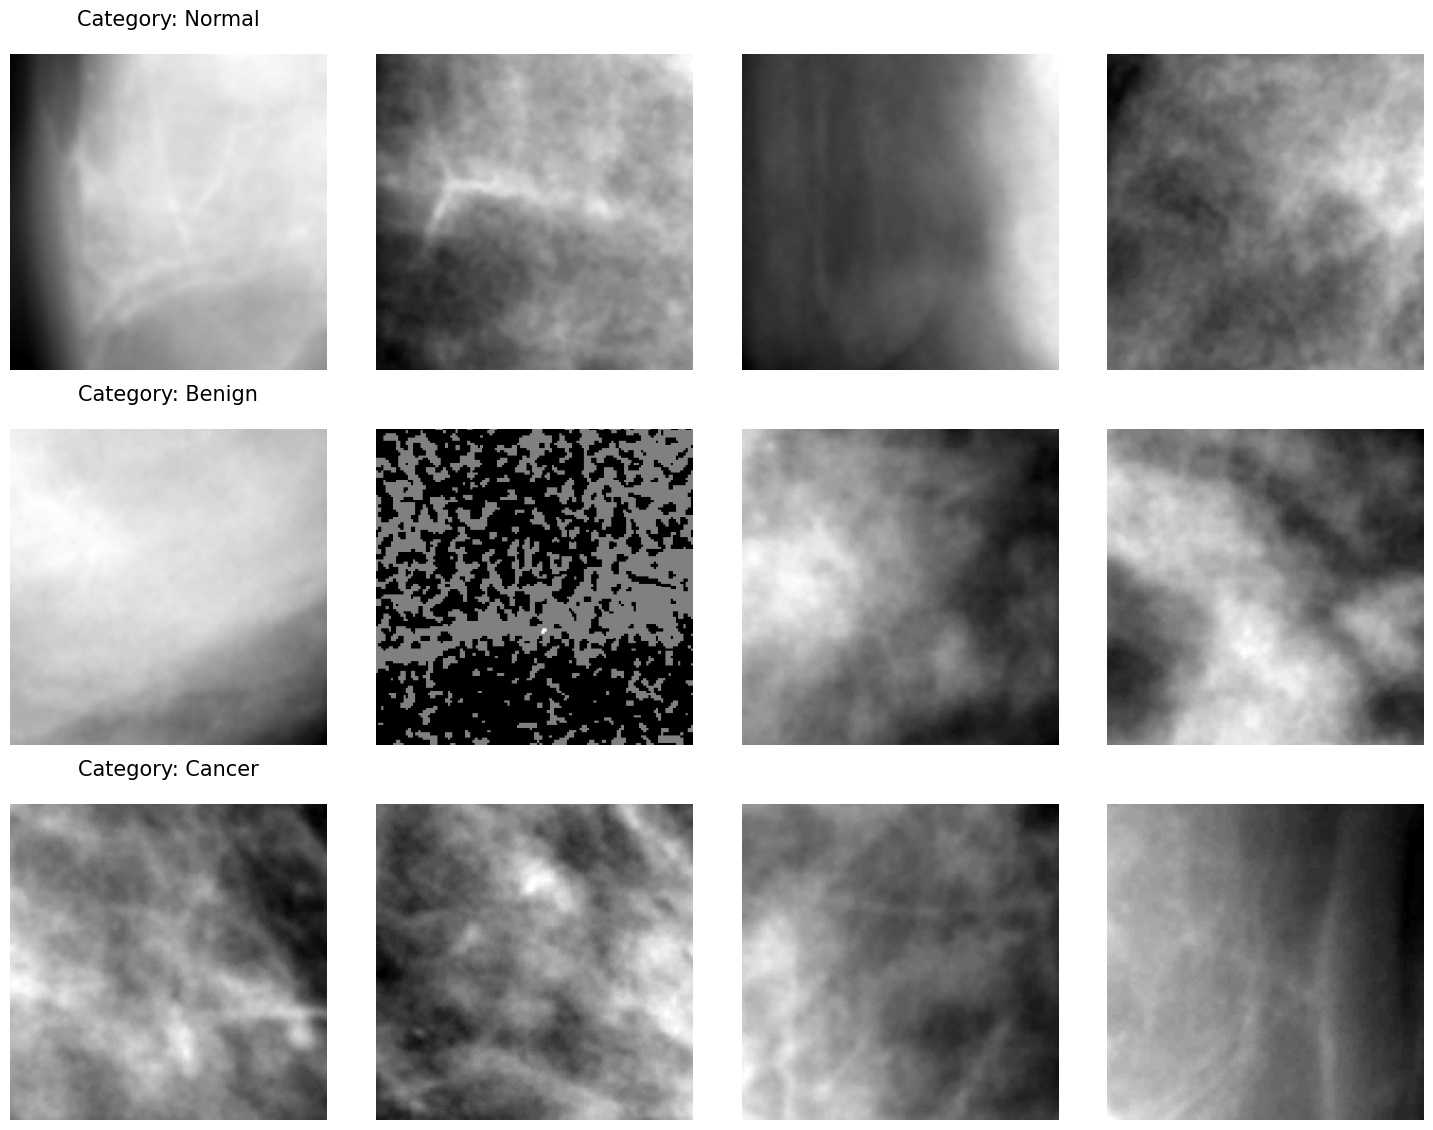

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

def show_images_from_folders(normal_folder, benign_folder, cancer_folder, num_images=4):
    folders = [normal_folder, benign_folder, cancer_folder]
    labels = ['Normal', 'Benign', 'Cancer']
    
    # Povecan figsize za vise razmaka izmedju redova
    fig, axes = plt.subplots(3, num_images, figsize=(15, 12))
    
    for idx, (folder, label) in enumerate(zip(folders, labels)):
        #Prikaz svih poddirektorijuma
        subfolders = [os.path.join(folder, name) for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

        #Prikazivanje odredjenog broja slika iz svakog podfoldera
        for i in range(num_images):
            if i < len(subfolders):
                subfolder = subfolders[i]
                #Prikaz svih fajlova u podfolderima, bez fajlova koji pocinju sa '.'
                files = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f)) and not f.startswith('.')]

                #Prikaz prve slike podfoldera
                if files:
                    image_path = os.path.join(subfolder, files[0])
                    if image_path.endswith('.npy'):
                        try:
                            image = np.load(image_path)
                            axes[idx, i].imshow(image, cmap='gray')
                            axes[idx, i].axis('off')
                            if i == 0:  # Dodavanje naslova iznad prve slike u svakom redu
                                axes[idx, i].set_title(f"Category: {label}", fontsize=15, pad=20)
                        except Exception as e:
                            print(f"Failed to load image: {image_path}. Error: {e}")
                    else:
                        print(f"File not found or not an npy file: {image_path}")
                else:
                    print(f"No files found in subfolder: {subfolder}")

    #Prilagodjavanje razmaka izmedju redova
    plt.subplots_adjust(hspace=0.5)

    # Povećavanje razmaka oko figure za dodatni prostor
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#Putanje do output foldera gde su smestene pretprocesiranje slike
normal_folder = "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Normal"
benign_folder = "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Benign"
cancer_folder = "C:\\Users\\Win10\\Desktop\\MIEP\\DDSMnpy\\Cancer"

# Prikaz po 4 slike iz svakog foldera
show_images_from_folders(normal_folder, benign_folder, cancer_folder)
